recognition model 2

In [2]:
from pathlib import Path
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import matplotlib.pyplot as plt
import os

In [3]:
# Define paths
data_dir = Path(r"C:\Users\MSII\Desktop\breed recognition data set\Indian_bovine_breeds")  # Replace with actual path
img_size = (224, 224)
batch_size = 32

# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

# Class names
class_names = train_ds.class_names
num_classes = len(class_names)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Found 5947 files belonging to 41 classes.
Using 4758 files for training.
Found 5947 files belonging to 41 classes.
Using 1189 files for validation.


In [4]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [5]:
base_model = MobileNetV2(input_shape=img_size + (3,),
                         include_top=False,
                         weights='imagenet')
base_model.trainable = False  # Freeze base

inputs = layers.Input(shape=img_size + (3,))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

In [6]:
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.1112 - loss: 3.7087

149/149 ━━━━━━━━━━━━━━━━━━━━ 134s 860ms/step - accuracy: 0.1673 - loss: 3.2833 - val_accuracy: 0.2733 - val_loss: 2.5808
Epoch 2/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 0.2962 - loss: 2.5355

149/149 ━━━━━━━━━━━━━━━━━━━━ 109s 734ms/step - accuracy: 0.3062 - loss: 2.4857 - val_accuracy: 0.3642 - val_loss: 2.2819
Epoch 3/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.3607 - loss: 2.2502

149/149 ━━━━━━━━━━━━━━━━━━━━ 105s 704ms/step - accuracy: 0.3594 - loss: 2.2664 - val_accuracy: 0.3835 - val_loss: 2.1957
Epoch 4/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.4013 - loss: 2.1096

149/149 ━━━━━━━━━━━━━━━━━━━━ 111s 744ms/step - accuracy: 0.3974 - loss: 2.1113 - val_accuracy: 0.3860 - val_loss: 2.1455
Epoch 5/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.4355 - loss: 1.9569

149/149 ━━━━━━━━━━━━━━━━━━━━ 109s 732ms/step - accuracy: 0.4227 - loss: 1.9984 - val_accuracy: 0.4087 - val_loss: 2.0739
Epoch 6/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 109s 728ms/step - accuracy: 0.4475 - loss: 1.9089 - val_accuracy: 0.4071 - val_loss: 2.0860
Epoch 7/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.4716 - loss: 1.8209

149/149 ━━━━━━━━━━━━━━━━━━━━ 108s 721ms/step - accuracy: 0.4561 - loss: 1.8527 - val_accuracy: 0.4071 - val_loss: 2.0596
Epoch 8/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.4757 - loss: 1.7605

149/149 ━━━━━━━━━━━━━━━━━━━━ 112s 751ms/step - accuracy: 0.4725 - loss: 1.7724 - val_accuracy: 0.4071 - val_loss: 2.0399
Epoch 9/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 699ms/step - accuracy: 0.5037 - loss: 1.6919

149/149 ━━━━━━━━━━━━━━━━━━━━ 125s 840ms/step - accuracy: 0.4933 - loss: 1.7277 - val_accuracy: 0.4214 - val_loss: 2.0285
Epoch 10/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 616ms/step - accuracy: 0.4987 - loss: 1.6894

149/149 ━━━━━━━━━━━━━━━━━━━━ 111s 745ms/step - accuracy: 0.4996 - loss: 1.6929 - val_accuracy: 0.4113 - val_loss: 2.0175
Epoch 11/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.5145 - loss: 1.6501

149/149 ━━━━━━━━━━━━━━━━━━━━ 105s 700ms/step - accuracy: 0.5126 - loss: 1.6554 - val_accuracy: 0.4340 - val_loss: 1.9794
Epoch 12/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 147s 735ms/step - accuracy: 0.5053 - loss: 1.6581 - val_accuracy: 0.4340 - val_loss: 1.9861
Epoch 13/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 105s 704ms/step - accuracy: 0.5179 - loss: 1.6143 - val_accuracy: 0.4373 - val_loss: 1.9812
Epoch 14/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 110s 734ms/step - accuracy: 0.5128 - loss: 1.6012 - val_accuracy: 0.4230 - val_loss: 2.0205
Epoch 15/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 106s 711ms/step - accuracy: 0.5284 - loss: 1.5882 - val_accuracy: 0.4256 - val_loss: 2.0058
Epoch 16/20
149/149 ━━━━━━━━━━━━━━━━━━━━ 108s 725ms/step - accuracy: 0.5429 - loss: 1.5428 - val_accuracy: 0.4230 - val_loss: 2.0189


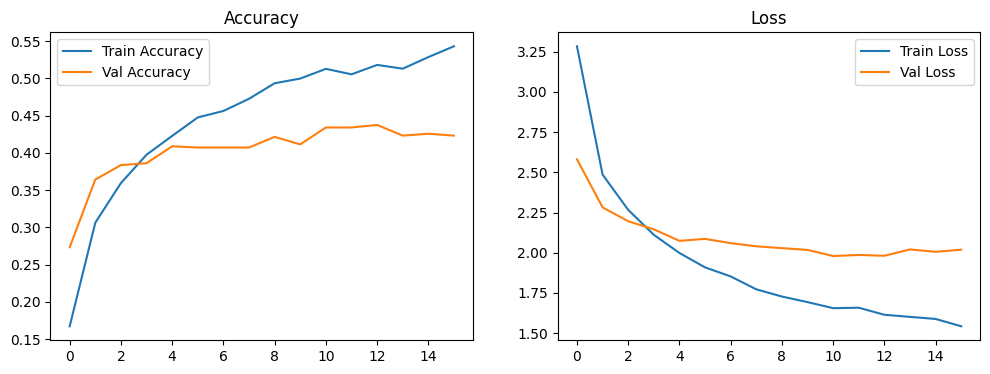

In [7]:
# Plot accuracy and loss
def plot_metrics(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_metrics(history)

In [8]:
# Unfreeze last few layers of base model
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.3901 - loss: 2.1584

149/149 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.4056 - loss: 2.1184 - val_accuracy: 0.4491 - val_loss: 1.9400
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 765ms/step - accuracy: 0.4643 - loss: 1.8822

149/149 ━━━━━━━━━━━━━━━━━━━━ 134s 898ms/step - accuracy: 0.4639 - loss: 1.8646 - val_accuracy: 0.4542 - val_loss: 1.9307
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 135s 906ms/step - accuracy: 0.4859 - loss: 1.7521 - val_accuracy: 0.4542 - val_loss: 1.9333
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 764ms/step - accuracy: 0.5151 - loss: 1.6616

149/149 ━━━━━━━━━━━━━━━━━━━━ 134s 897ms/step - accuracy: 0.5139 - loss: 1.6735 - val_accuracy: 0.4617 - val_loss: 1.9255
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.5278 - loss: 1.6055

149/149 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.5254 - loss: 1.6108 - val_accuracy: 0.4617 - val_loss: 1.9174
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 756ms/step - accuracy: 0.5326 - loss: 1.5659

149/149 ━━━━━━━━━━━━━━━━━━━━ 131s 877ms/step - accuracy: 0.5292 - loss: 1.5616 - val_accuracy: 0.4727 - val_loss: 1.9066
Epoch 7/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.5572 - loss: 1.4874

149/149 ━━━━━━━━━━━━━━━━━━━━ 137s 918ms/step - accuracy: 0.5460 - loss: 1.5182 - val_accuracy: 0.4727 - val_loss: 1.8955
Epoch 8/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 766ms/step - accuracy: 0.5569 - loss: 1.4641

149/149 ━━━━━━━━━━━━━━━━━━━━ 133s 894ms/step - accuracy: 0.5557 - loss: 1.4818 - val_accuracy: 0.4760 - val_loss: 1.8868
Epoch 9/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.5529 - loss: 1.4503

149/149 ━━━━━━━━━━━━━━━━━━━━ 135s 907ms/step - accuracy: 0.5479 - loss: 1.4767 - val_accuracy: 0.4760 - val_loss: 1.8772
Epoch 10/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 145s 971ms/step - accuracy: 0.5658 - loss: 1.4479 - val_accuracy: 0.4786 - val_loss: 1.8797


In [4]:
# Save the trained model as a pickle (.pkl) file only
import joblib
try:
    joblib.dump(model, 'indian_bovine_breed_model.pkl')
except Exception as e:
    print('Pickle save failed:', e)
    print('Keras models are best saved with .h5 format. If you need to save weights, use model.save_weights().')

Pickle save failed: name 'model' is not defined
Keras models are best saved with .h5 format. If you need to save weights, use model.save_weights().
